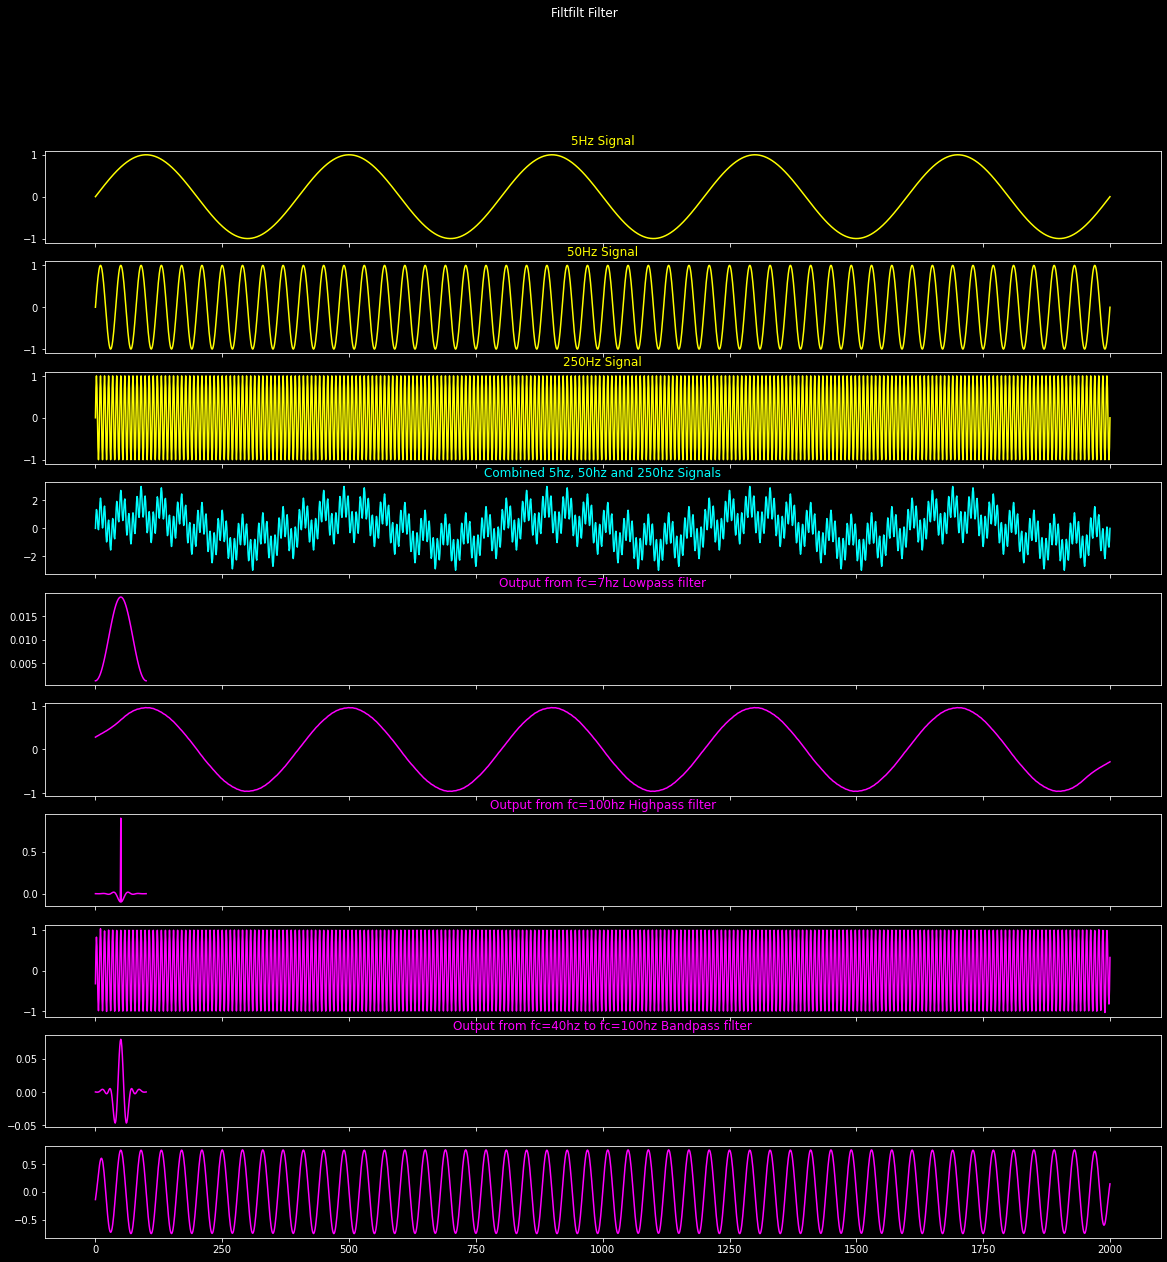

In [37]:
from matplotlib import pyplot as plt
from scipy import signal
from matplotlib import style
import numpy as np

#Signal samplying rate of 2000Hz, ntg=1000
t = np.linspace(0,1.0,2001)

sig_5hz = np.sin(2*np.pi*5*t)
sig_50hz = np.sin(2*np.pi*50*t)
sig_250hz = np.sin(2*np.pi*250*t)
sig_5hz_50hz_250hz = sig_5hz + sig_50hz + sig_250hz

numtaps = 101
lpf_cutoff = 7 #Hz
hpf_cutoff = 100 #Hz
bp_cutoff1 = 40 # HZ
bp_cutoff2 = 100 # HZ

#Lowpass
lowpass_coef = signal.firwin(numtaps, lpf_cutoff, nyq=1000)
lpg_output = signal.convolve(sig_5hz_50hz_250hz, lowpass_coef, mode='same')

#Highpass
highpass_coef = signal.firwin(numtaps, hpf_cutoff, pass_zero=False, nyq=1000)
hpg_output = signal.convolve(sig_5hz_50hz_250hz, highpass_coef, mode='same')

#Bandpass
bandpass_coef = signal.firwin(numtaps, [bp_cutoff1, bp_cutoff2], pass_zero=False, nyq=1000)
bp_output = signal.convolve(sig_5hz_50hz_250hz, bandpass_coef, mode='same')


style.use('dark_background')

plt.rcParams["figure.figsize"] = (20,20)
f, plt_arr =plt.subplots(10,sharex=True)
f.suptitle('Filtfilt Filter')

plt_arr[0].plot(sig_5hz,color='yellow')
plt_arr[0].set_title("5Hz Signal", color ='yellow')
plt_arr[1].plot(sig_50hz,color='yellow')
plt_arr[1].set_title("50Hz Signal", color ='yellow')
plt_arr[2].plot(sig_250hz,color='yellow')
plt_arr[2].set_title("250Hz Signal", color ='yellow')
plt_arr[3].plot(sig_5hz_50hz_250hz,color='cyan')
plt_arr[3].set_title("Combined 5hz, 50hz and 250hz Signals", color ='cyan')

plt_arr[4].plot(lowpass_coef,color='magenta')
plt_arr[4].set_title("Output from fc=7hz Lowpass filter", color ='magenta')
plt_arr[5].plot(lpg_output,color='magenta')

plt_arr[6].plot(highpass_coef,color='magenta')
plt_arr[6].set_title("Output from fc=100hz Highpass filter", color ='magenta')
plt_arr[7].plot(hpg_output,color='magenta')

plt_arr[8].plot(bandpass_coef,color='magenta')
plt_arr[8].set_title("Output from fc=40hz to fc=100hz Bandpass filter", color ='magenta')
plt_arr[9].plot(bp_output,color='magenta')
plt.show()

